In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model



Found 196 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


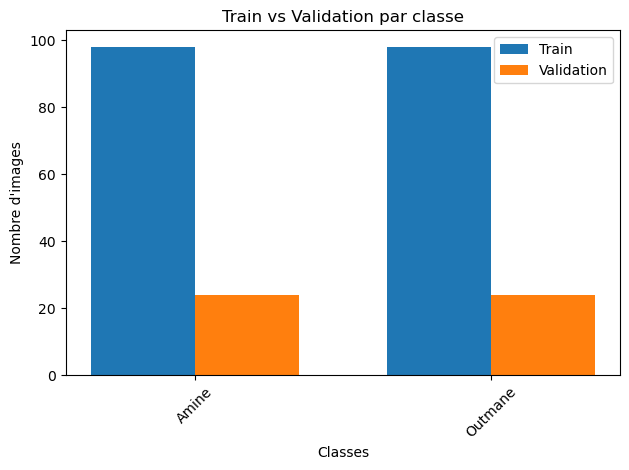

{'Amine': 0, 'Outmane': 1}


In [3]:
# Augmentation des données de train, et test
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "dataset/",
    target_size=(224, 224),
    batch_size=8,
    class_mode="categorical",
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    "dataset/",
    target_size=(224, 224),
    batch_size=8,
    class_mode="categorical",
    subset="validation"
)

# visualiser les donnees d'entrainement et du validation
# Mapping id → nom
labels = {v: k for k, v in train_gen.class_indices.items()}

# Classes de chaque image
class_ids = train_gen.classes

# Compter les images par classe
unique, counts = np.unique(class_ids, return_counts=True)

class_names = [labels[i] for i in unique]
class_counts = counts
val_unique, val_counts = np.unique(val_gen.classes, return_counts=True)

val_class_names = [labels[i] for i in val_unique]

x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, class_counts, width, label="Train")
plt.bar(x + width/2, val_counts, width, label="Validation")

plt.xticks(x, class_names, rotation=45)
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.title("Train vs Validation par classe")
plt.legend()
plt.tight_layout()
plt.show()

print(train_gen.class_indices)

In [4]:
# Utilisation de model VGG19
base = VGG19(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in base.layers:
    layer.trainable = False # freeze l'entrainement du model


In [5]:
# Ajouter notre couche avec function d'activation softmax
x = base.output
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
num_classes = train_gen.num_classes
output = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base.input, outputs=output)
# summary
model.summary()
plot_model(
    model,
    to_file="model_architecture.png",
    show_shapes=True,
    dpi=150
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,614,594 (78.64 MB)

 Trainable params: 590,210 (2.25 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [6]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)
model.save("model/vgg19_face_model.h5")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9388 - loss: 1.1856 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9949 - loss: 0.0134 - val_accuracy: 0.9792 - val_loss: 0.2192
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.9898 - loss: 0.1201 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9949 - loss: 0.0285 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.9949 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.9949 - loss: 0.0128 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9949 - loss: 0.0230 - val_accuracy: 1.0000 - val_loss: 4.8428e-07
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 1.0000 - loss: 1.0704e-06 - val_

In [8]:
model.evaluate(val_gen)

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9792 - loss: 0.0217    


[0.021660828962922096, 0.9791666865348816]

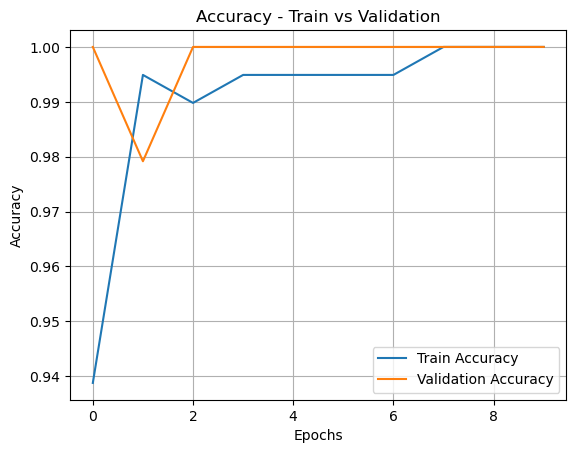

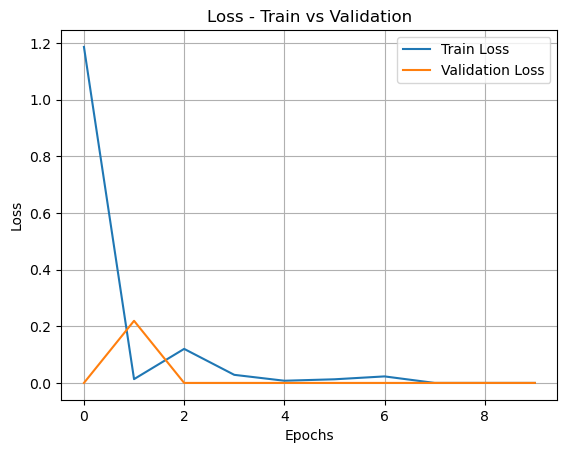

In [9]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy - Train vs Validation')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss - Train vs Validation')
plt.legend()
plt.grid(True)
plt.show()